# Test verifications to get human labels

In [1]:
import polars as pl
import os
pl.Config.set_fmt_str_lengths(400)
import matplotlib.pyplot as plt
import json

In [2]:
DATA_PATH = os.getenv("DATA_PATH", "")

In [113]:
# Load fnames for later manual inspection
fnames = pl.read_parquet(f"{DATA_PATH}/raw/farcaster-fnames-0-1730134800.parquet")
last_fnames = fnames[["fid","updated_at"]].group_by("fid").max()
last_fnames = last_fnames.join(fnames,on=["fid","updated_at"],how="left",coalesce=True)[["fid","fname"]]
last_fnames

fid,fname
i64,str
244489,"""alekzander11"""
459345,"""nhiyla"""
732359,"""jangofett"""
361413,"""thomasanthony"""
7235,"""abh"""
…,…
218500,"""dills05"""
640676,"""vfdsfsd"""
717267,"""cassieli827"""


### X verifications

In [117]:
x_verifications = pl.read_parquet(f"{DATA_PATH}/raw/farcaster-account_verifications-0-1730134800.parquet")
x_verifications = x_verifications.join(last_fnames,how="left",left_on="fid",right_on="fid",coalesce=True)
x_verifications

created_at,updated_at,deleted_at,fid,platform,platform_id,platform_username,verified_at,id,fname
datetime[ns],datetime[ns],datetime[ns],i64,str,str,str,datetime[ns],i64,str
2024-10-16 20:12:22.847811,2024-10-16 20:12:22.847811,null,3,"""x""","""9615352""","""dwr""",2024-10-09 20:29:08,1,"""danromero.eth"""
2024-10-16 20:12:22.853661,2024-10-16 20:12:22.853661,null,12,"""x""","""520770492""","""ljxie""",2024-10-11 16:53:17,2,"""linda"""
2024-10-16 20:12:22.858197,2024-10-16 20:12:22.858197,null,17,"""x""","""27771371""","""shanedasilva""",2024-09-28 18:18:04,3,"""sds.eth"""
2024-10-16 20:12:22.862130,2024-10-16 20:12:22.862130,null,73,"""x""","""741057341072781312""","""shawkisukkar""",2024-10-11 18:54:42,4,"""shawki"""
2024-10-16 20:12:22.866112,2024-10-16 20:12:22.866112,null,75,"""x""","""15109833""","""_o_s_a_m_a""",2024-10-11 19:25:26,5,"""osama"""
…,…,…,…,…,…,…,…,…,…
2024-10-28 02:35:00.946323,2024-10-28 02:35:00.946323,null,4871,"""x""","""31503218""","""neogeomancer""",2024-10-28 02:31:02,11438,"""urcades.eth"""
2024-10-28 10:30:00.315082,2024-10-28 10:30:00.315082,null,5551,"""x""","""17434789""","""mumbot""",2024-10-28 10:28:52,11439,"""mumbot.eth"""
2024-10-28 11:00:00.288407,2024-10-28 11:00:00.288407,null,16301,"""x""","""1778689101828378624""","""HarryOri95251""",2024-10-28 10:55:17,11440,"""rioter"""


In [118]:
pl.Config.set_tbl_rows(30)
samples = x_verifications[["fid","fname"]].sample(30,seed=1)
samples

fid,fname
i64,str
617548,"""ctfucsy"""
12958,"""yungsb.eth"""
359048,"""kochiro"""
461253,"""xeno37"""
217910,"""flush94.eth"""
410690,"""fdilekyurdakul"""
326708,"""oxmadnft"""
618494,"""usm1234"""
528259,"""maryamtr"""


In [120]:
manual_inspection = {
 'ctfucsy': True,
 'yungsb.eth': True,
 'kochiro': True,
 'xeno37': True,
 'flush94.eth': True,
 'fdilekyurdakul': True,
 'oxmadnft': True,
 'usm1234': True,
 'maryamtr': True,
 'hamo36': True,
 'shaahini': True,
 'jasylum': True,
 'egypt': True,
 'youngseku': False,
 'taitt2600': True,
 'forch': True,
 'roockyou': True,
 'dylantheman': False,
 'zhopian': True,
 'faridmuhajir54': True,
 'natedev.eth': False,
 'ballynfen': True,
 'pioretta': True,
 'aliakbarto': True,
 'phirio66': True,
 'catharsis13': True,
 'sorena': True,
 'bubun009': True,
 'monkay': True,
 'yauhenius.eth': True
 }

In [123]:
true_count = sum(1 for x in manual_inspection.values() if x)
false_count = sum(1 for x in manual_inspection.values() if not x)

print(f"Bot percentage in X verifications: {(100*true_count/(true_count+false_count)):.2f}%")

Bot percentage in X verifications: 90.00%


### Address verifications

In [124]:
address_verifications = pl.read_parquet(f"{DATA_PATH}/raw/farcaster-profile_with_addresses-0-1730134800.parquet")
address_verifications.filter(~pl.col("fname").is_null())

fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid
str,str,str,str,str,datetime[ns],i64
"""palm""","""Brandonkz""","""https://lh3.googleusercontent.com/V4GzX-5Dh7zLdY1wlWFYLalIf-HExZwM6WIvAMPH2NxugVQk8keUR5yrYfD9rbNEjQPDKT4Ed5xhzAL_GErEMAZ37zgR9x14YZehtg""","""GP at a crypto VC fund and bankless writer, previously a cosmos builder. Professional airdrop misser""","""[]""",2024-06-06 15:46:22.087,2004
"""done-with-fish""","""Brian Fitzpatrick ""","""https://i.imgur.com/l9b8nC1.jpg""","""Mathematician interested in film.""","""[]""",2024-06-06 16:10:29.270,11855
"""0x59""","""WEB3""","""https://i.imgur.com/D2vZGJq.png""","""Nelia""","""[]""",2024-06-06 16:55:12.408,22892
"""suzhen""",null,null,null,"""[]""",2024-06-06 16:55:42.465,23587
"""8181""","""lhaf""","""https://i.imgur.com/cS47Tu8.jpg""","""6785""","""[]""",2024-06-06 16:55:42.503,23584
"""liuyi""","""liuyi""","""https://i.imgur.com/YKw9Aud.png""",null,"""[]""",2024-06-06 16:55:42.654,23586
"""mickrenders""","""Mickrenders.eth""","""https://i.imgur.com/jhoNM4h.jpg""","""digital artist www.mickrenders.xyz""","""[""0x0bfd50d57bc04561f546a7be2830151af536854b""]""",2024-06-06 16:55:42.824,23583
"""oy""",null,null,null,"""[]""",2024-06-06 16:55:44.185,23710
"""kimi""",null,null,null,"""[]""",2024-06-06 17:01:40.566,85624


In [92]:
address_verifications = pl.read_parquet(f"{DATA_PATH}/raw/farcaster-profile_with_addresses-0-1730134800.parquet")
single_address_with_ens = address_verifications.filter(pl.col("fname").str.ends_with(".eth") & ~pl.col("verified_addresses").str.contains(",") & pl.col("verified_addresses").str.contains("0x") )
single_address_with_ens

fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid
str,str,str,str,str,datetime[ns],i64
"""cdixon.eth""","""Chris Dixon""","""https://i.imgur.com/ju8z8lD.jpg""","""Crypto/web3. Author of Read Write Own readwriteown.com""","""[""0xe11bfcbdd43745d4aa6f4f18e24ad24f4623af04""]""",2024-06-07 16:44:09.046,25
"""balajis.eth""","""balajis""","""https://github.com/balajis.png""","""Author of thenetworkstate.com.""","""[""0x0916c04994849c676ab2667ce5bbdf7ccc94310a""]""",2024-06-07 16:44:11.542,37
"""nickgrossman.eth""","""Nick Grossman""","""https://i.imgur.com/LMQMcab.png""","""Partner @USV. Student of cities and the internet. https://nickgrossman.xyz""","""[""0xd3dd62e5ad098d2220e3921d41494fb9754c1bf1""]""",2024-06-07 16:45:06.227,168
"""dfmerin.eth""","""Dave Merin 🦊🎩""","""https://lh3.googleusercontent.com/kJL6ipDlIoSit5uJuCk9DAn8_2RBkfOR_6d5Hi5yD37PVFWAWBbYxKV69NbfRcWifIUjUms5FvKzxLeR6-CooOONgBG4vQsWyq0b""","""Head of Corp Dev @ ConsenSys // dfmerin.com // dfmerin.twitter ""","""[""0x282173335ae1f328b34eb9acadc052e59e70a89f""]""",2024-06-07 16:45:24.742,262
"""clacla.eth""","""clacla""","""https://i.imgur.com/vLA4EnP.jpg""","""Builder""","""[""0xd06d9c4e5fe6ee578e4ee5e539ecb8b3453df029""]""",2024-06-07 16:48:06.799,699
…,…,…,…,…,…,…
"""corporatefilth.eth""","""Pete""","""https://ipfs.decentralized-content.com/ipfs/bafybeifw7e7taqmtudrre7hwewdwiynlbhr232l5wf3xtrhexvj22nswrq/images/5255.png""","""""","""[""0xc9706e271241d24dcb1b41119b4096b8116c662a""]""",2024-10-28 13:09:00.099902,1184
"""mrgor.eth""","""MrGor.ETH""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/f778408b-8c48-4cb6-1675-6060ba9a9200/original""","""Software Engineer | Backend Developer | Smart Contract Developer | Web3 & DeFi Enthusiast""","""[""0x6ee02cc6acfc6af5912499ee265b92b195b49e44""]""",2024-10-28 14:22:23.440168,871086
"""sio.eth""","""sio""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/9f9bffa0-c311-4571-7a19-9e8439cc6400/original""","""Lead Product Designer at aragon.org ⟡ Cyclist ⟡ Music Nerd ⟡ Sourdough Dad""","""[""0xd5fb864acfd6bb2f72939f122e89ff7f475924f5""]""",2024-10-28 14:50:10.912488,6116


In [93]:
# Create a column for single address
single_address_with_ens = single_address_with_ens.with_columns(pl.col("verified_addresses").str.slice(2,42).alias("address"))
# Remove users with duplicated address
duplicated_addresses = single_address_with_ens[["address"]].filter(pl.col("address").is_duplicated())["address"].to_list()
single_address_with_ens = single_address_with_ens.filter(~pl.col("address").is_in( duplicated_addresses ))
single_address_with_ens

fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid,address
str,str,str,str,str,datetime[ns],i64,str
"""cdixon.eth""","""Chris Dixon""","""https://i.imgur.com/ju8z8lD.jpg""","""Crypto/web3. Author of Read Write Own readwriteown.com""","""[""0xe11bfcbdd43745d4aa6f4f18e24ad24f4623af04""]""",2024-06-07 16:44:09.046,25,"""0xe11bfcbdd43745d4aa6f4f18e24ad24f4623af04"""
"""balajis.eth""","""balajis""","""https://github.com/balajis.png""","""Author of thenetworkstate.com.""","""[""0x0916c04994849c676ab2667ce5bbdf7ccc94310a""]""",2024-06-07 16:44:11.542,37,"""0x0916c04994849c676ab2667ce5bbdf7ccc94310a"""
"""nickgrossman.eth""","""Nick Grossman""","""https://i.imgur.com/LMQMcab.png""","""Partner @USV. Student of cities and the internet. https://nickgrossman.xyz""","""[""0xd3dd62e5ad098d2220e3921d41494fb9754c1bf1""]""",2024-06-07 16:45:06.227,168,"""0xd3dd62e5ad098d2220e3921d41494fb9754c1bf1"""
"""dfmerin.eth""","""Dave Merin 🦊🎩""","""https://lh3.googleusercontent.com/kJL6ipDlIoSit5uJuCk9DAn8_2RBkfOR_6d5Hi5yD37PVFWAWBbYxKV69NbfRcWifIUjUms5FvKzxLeR6-CooOONgBG4vQsWyq0b""","""Head of Corp Dev @ ConsenSys // dfmerin.com // dfmerin.twitter ""","""[""0x282173335ae1f328b34eb9acadc052e59e70a89f""]""",2024-06-07 16:45:24.742,262,"""0x282173335ae1f328b34eb9acadc052e59e70a89f"""
"""clacla.eth""","""clacla""","""https://i.imgur.com/vLA4EnP.jpg""","""Builder""","""[""0xd06d9c4e5fe6ee578e4ee5e539ecb8b3453df029""]""",2024-06-07 16:48:06.799,699,"""0xd06d9c4e5fe6ee578e4ee5e539ecb8b3453df029"""
…,…,…,…,…,…,…,…
"""corporatefilth.eth""","""Pete""","""https://ipfs.decentralized-content.com/ipfs/bafybeifw7e7taqmtudrre7hwewdwiynlbhr232l5wf3xtrhexvj22nswrq/images/5255.png""","""""","""[""0xc9706e271241d24dcb1b41119b4096b8116c662a""]""",2024-10-28 13:09:00.099902,1184,"""0xc9706e271241d24dcb1b41119b4096b8116c662a"""
"""mrgor.eth""","""MrGor.ETH""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/f778408b-8c48-4cb6-1675-6060ba9a9200/original""","""Software Engineer | Backend Developer | Smart Contract Developer | Web3 & DeFi Enthusiast""","""[""0x6ee02cc6acfc6af5912499ee265b92b195b49e44""]""",2024-10-28 14:22:23.440168,871086,"""0x6ee02cc6acfc6af5912499ee265b92b195b49e44"""
"""sio.eth""","""sio""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/9f9bffa0-c311-4571-7a19-9e8439cc6400/original""","""Lead Product Designer at aragon.org ⟡ Cyclist ⟡ Music Nerd ⟡ Sourdough Dad""","""[""0xd5fb864acfd6bb2f72939f122e89ff7f475924f5""]""",2024-10-28 14:50:10.912488,6116,"""0xd5fb864acfd6bb2f72939f122e89ff7f475924f5"""


### Test ENS name API

In [83]:
# import argparse
from web3 import Web3

infura_url = os.getenv("INFURA_API_URL", "")
web3 = Web3(Web3.HTTPProvider(infura_url))

row = single_address_with_ens[1]

row_address = row["address"][0]
row_name = row["fname"][0]

name = web3.ens.name(row_address)

if name:
    print(f"Name found for {row_address} - {name}")
else:
    print(f"ENS address {row_address} could not be found")
print("Name in the dataset:",row_name)

Name found for 0x0916c04994849c676ab2667ce5bbdf7ccc94310a - balajis.eth
Name in the dataset: balajis.eth


### Routine to get all ENS names

In [69]:
import concurrent.futures
import time
from typing import Dict, List, Optional
from functools import partial
import random

def resolve_ens_name_with_retry(address: str, web3, max_retries: int = 10) -> tuple[str, Optional[str]]:
    """
    Resolve a single ENS name for an address with retry mechanism.
    Returns a tuple of (address, name) where name might be None if resolution fails.
    """
    for attempt in range(max_retries):
        try:
            name = web3.ens.name(address)
            if name:
                print(f"{address} {name} OK")
                return (address, name)
            else:
                print(f"{address} FAIL")
                return (address, None)
                
        except Exception as e:
            # Calculate delay with exponential backoff and jitter
            delay = min(300, (2 ** attempt) + random.uniform(0, 1))
            
            if attempt < max_retries - 1:
                print(f"Error resolving {address} (attempt {attempt + 1}/{max_retries}): {str(e)}")
                print(f"Retrying in {delay:.2f} seconds...")
                time.sleep(delay)
            else:
                print(f"Final error resolving {address} after {max_retries} attempts: {str(e)}")
                return (address, None)

def process_batch(addresses: List[str], web3, max_retries: int) -> Dict[str, Optional[str]]:
    """Process a batch of addresses concurrently and return address-name mappings."""
    results = {}
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        # Create partial function with max_retries
        resolve_func = partial(resolve_ens_name_with_retry, web3=web3, max_retries=max_retries)
        
        futures = [
            executor.submit(resolve_func, address)
            for address in addresses
        ]
        
        for future in concurrent.futures.as_completed(futures):
            address, name = future.result()
            results[address] = name
            
    return results

def batch_resolve_ens_names(
    addresses: List[str], 
    web3, 
    batch_size: int = 5, 
    max_retries: int = 10
) -> Dict[str, Optional[str]]:
    """Resolve ENS names in batches with pauses between batches."""
    eth_names = {}
    total_batches = (len(addresses) + batch_size - 1) // batch_size
    
    # Split addresses into batches
    for i in range(0, len(addresses), batch_size):
        current_batch = i // batch_size + 1
        batch = addresses[i:i + batch_size]
        
        print(f"\nProcessing batch {current_batch}/{total_batches}...")
        batch_results = process_batch(batch, web3, max_retries)
        eth_names.update(batch_results)
        
        # Don't sleep after the last batch
        if i + batch_size < len(addresses):
            sleep_time = 1.5  # Increased pause between batches
            print(f"Pausing for {sleep_time} seconds...")
            time.sleep(sleep_time)
    
    return eth_names

def main(addresses: List[str], web3, batch_size: int = 5, max_retries: int = 10):
    """Main execution function with configurable parameters."""
    print(f"Starting ENS resolution for {len(addresses)} addresses:")
    print(f"Batch size: {batch_size}")
    print(f"Max retries: {max_retries}")
    
    eth_names = batch_resolve_ens_names(
        addresses, 
        web3, 
        batch_size=batch_size, 
        max_retries=max_retries
    )
    
    # Count successful resolutions
    successful = sum(1 for name in eth_names.values() if name is not None)
    print("\nResolution complete:")
    print(f"Successful: {successful}")
    print(f"Failed: {len(addresses) - successful}")
    
    with open(f"{DATA_PATH}/interim/ens_names.json", 'w') as f:
        json.dump(eth_names, f, indent=4)

# Usage example:

main(single_address_with_ens["address"].to_list(), web3)

Starting ENS resolution for 1286 addresses:
Batch size: 5
Max retries: 10

Processing batch 1/258...
0x7c25a8c86a04f40f2db0434ab3a24b051fb3ca58 FAIL
Error resolving 0xee8edcc4b3b4f6f7cfcfb5712d3a421a8e93bbf3 (attempt 1/10): 429 Client Error: Too Many Requests for url: https://mainnet.infura.io/v3/8ca373e31c3f44bea6a194ab877de49b
Retrying in 1.57 seconds...
0x9f87b81ba9d3cb12953923d73c575b8c97705215 babylonbtc.eth OK
0x5d03782725982a743e7afba4a464751d68e127a1 0xamaj.eth OK
Error resolving 0xac3b33f46266f1dae99a0c05b0c9c3e9d45b21a0 (attempt 1/10): 429 Client Error: Too Many Requests for url: https://mainnet.infura.io/v3/8ca373e31c3f44bea6a194ab877de49b
Retrying in 1.37 seconds...
0xee8edcc4b3b4f6f7cfcfb5712d3a421a8e93bbf3 chinemelum.eth OK
0xac3b33f46266f1dae99a0c05b0c9c3e9d45b21a0 audio.slowdomains.eth OK
Pausing for 1.5 seconds...

Processing batch 2/258...
0x79a7f193d6557ae6f1e08afc71d235f3102da621 glebshum.eth OK
0xa85572cd96f1643458f17340b6f0d6549af482f5 fiveoutofnine.eth OK
0xb46a9

### Use names obtained to filter original dataset

In [94]:
with open(f"{DATA_PATH}/interim/ens_names.json","r") as f:
  ens_names = json.load(f)

# Add the column 'ens_name'
single_address_with_ens = single_address_with_ens.with_columns(pl.col("address").replace(ens_names,default=None).alias("ens_name"))

print("length before removing null ENS names:",len(single_address_with_ens))
single_address_with_ens = single_address_with_ens.filter(~pl.col("ens_name").is_null())
print("length after removing null ENS names:",len(single_address_with_ens))

print("length before removing fnames different than ENS names:",len(single_address_with_ens))
single_address_with_ens = single_address_with_ens.filter( pl.col("fname") == pl.col("ens_name") )
print("length after removing fnames different than ENS names:",len(single_address_with_ens))

single_address_with_ens

length before removing null ENS names: 4785
length after removing null ENS names: 4463
length before removing fnames different than ENS names: 4463
length after removing fnames different than ENS names: 4250


fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid,address,ens_name
str,str,str,str,str,datetime[ns],i64,str,str
"""cdixon.eth""","""Chris Dixon""","""https://i.imgur.com/ju8z8lD.jpg""","""Crypto/web3. Author of Read Write Own readwriteown.com""","""[""0xe11bfcbdd43745d4aa6f4f18e24ad24f4623af04""]""",2024-06-07 16:44:09.046,25,"""0xe11bfcbdd43745d4aa6f4f18e24ad24f4623af04""","""cdixon.eth"""
"""balajis.eth""","""balajis""","""https://github.com/balajis.png""","""Author of thenetworkstate.com.""","""[""0x0916c04994849c676ab2667ce5bbdf7ccc94310a""]""",2024-06-07 16:44:11.542,37,"""0x0916c04994849c676ab2667ce5bbdf7ccc94310a""","""balajis.eth"""
"""nickgrossman.eth""","""Nick Grossman""","""https://i.imgur.com/LMQMcab.png""","""Partner @USV. Student of cities and the internet. https://nickgrossman.xyz""","""[""0xd3dd62e5ad098d2220e3921d41494fb9754c1bf1""]""",2024-06-07 16:45:06.227,168,"""0xd3dd62e5ad098d2220e3921d41494fb9754c1bf1""","""nickgrossman.eth"""
"""dfmerin.eth""","""Dave Merin 🦊🎩""","""https://lh3.googleusercontent.com/kJL6ipDlIoSit5uJuCk9DAn8_2RBkfOR_6d5Hi5yD37PVFWAWBbYxKV69NbfRcWifIUjUms5FvKzxLeR6-CooOONgBG4vQsWyq0b""","""Head of Corp Dev @ ConsenSys // dfmerin.com // dfmerin.twitter ""","""[""0x282173335ae1f328b34eb9acadc052e59e70a89f""]""",2024-06-07 16:45:24.742,262,"""0x282173335ae1f328b34eb9acadc052e59e70a89f""","""dfmerin.eth"""
"""clacla.eth""","""clacla""","""https://i.imgur.com/vLA4EnP.jpg""","""Builder""","""[""0xd06d9c4e5fe6ee578e4ee5e539ecb8b3453df029""]""",2024-06-07 16:48:06.799,699,"""0xd06d9c4e5fe6ee578e4ee5e539ecb8b3453df029""","""clacla.eth"""
…,…,…,…,…,…,…,…,…
"""corporatefilth.eth""","""Pete""","""https://ipfs.decentralized-content.com/ipfs/bafybeifw7e7taqmtudrre7hwewdwiynlbhr232l5wf3xtrhexvj22nswrq/images/5255.png""","""""","""[""0xc9706e271241d24dcb1b41119b4096b8116c662a""]""",2024-10-28 13:09:00.099902,1184,"""0xc9706e271241d24dcb1b41119b4096b8116c662a""","""corporatefilth.eth"""
"""mrgor.eth""","""MrGor.ETH""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/f778408b-8c48-4cb6-1675-6060ba9a9200/original""","""Software Engineer | Backend Developer | Smart Contract Developer | Web3 & DeFi Enthusiast""","""[""0x6ee02cc6acfc6af5912499ee265b92b195b49e44""]""",2024-10-28 14:22:23.440168,871086,"""0x6ee02cc6acfc6af5912499ee265b92b195b49e44""","""mrgor.eth"""
"""sio.eth""","""sio""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/9f9bffa0-c311-4571-7a19-9e8439cc6400/original""","""Lead Product Designer at aragon.org ⟡ Cyclist ⟡ Music Nerd ⟡ Sourdough Dad""","""[""0xd5fb864acfd6bb2f72939f122e89ff7f475924f5""]""",2024-10-28 14:50:10.912488,6116,"""0xd5fb864acfd6bb2f72939f122e89ff7f475924f5""","""sio.eth"""


### Manual inspection of random names

In [95]:
pl.Config.set_tbl_rows(30)
single_address_with_ens.sample(30,seed=1)

fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid,address,ens_name
str,str,str,str,str,datetime[ns],i64,str,str
"""ruuruu.eth""","""0xRuuruu""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/b41d07dc-ac40-4492-74de-cd987180b100/original""","""🍼I am forever five years old / NFT / japanese ""","""[""0x432074e120ff63066021ad3674f55d8056db1c44""]""",2024-10-23 00:10:51.378960,331036,"""0x432074e120ff63066021ad3674f55d8056db1c44""","""ruuruu.eth"""
"""mrmellomonstr.eth""","""Ukrik""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/90264bd2-32d6-4a19-97fe-7c08129a2600/original""","""Mirai Team |未来| hue64 holder zk/arb enjoyer layer3 quest seeker""","""[""0xc8bcfdc971d9f71ea4c35a91b24cedc029fe8135""]""",2024-06-22 09:51:26.298,564201,"""0xc8bcfdc971d9f71ea4c35a91b24cedc029fe8135""","""mrmellomonstr.eth"""
"""reddevilccr.eth""","""Shishir 🎩☔""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/9dcf95d9-4434-40ff-6b4b-dd1084807000/original""","""Devil from the himalayas.""","""[""0x81df54bd9f9449153927e20d10046d59bd3aca95""]""",2024-10-23 16:42:49.824891,368767,"""0x81df54bd9f9449153927e20d10046d59bd3aca95""","""reddevilccr.eth"""
"""0xzara.eth""","""0xZara.eth🎩""","""https://i.imgur.com/Wp1Jq0z.jpg""","""🌟Living /carefree class president /metaverse-uni 🎨 Web 3 creator crafting tales, spreading onchain wisdom📚Empowering through entertainment""","""[""0x8aaef3c365f90318d15944587d1d3d842e16565a""]""",2024-06-07 18:44:53.134,221519,"""0x8aaef3c365f90318d15944587d1d3d842e16565a""","""0xzara.eth"""
"""krast.eth""","""Krast""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/a68f0b34-09fa-4f37-347b-cc2b77d8bb00/original""","""Fitness trainer dedicated to healthy living. Helping others achieve their best selves.""","""[""0xdea7410ba9c87699af261d89e5cc27520bc25865""]""",2024-06-08 16:48:36.573,534477,"""0xdea7410ba9c87699af261d89e5cc27520bc25865""","""krast.eth"""
"""openticketing.eth""","""Open Ticketing Ecosystem""","""https://i.imgur.com/Vq90nhp.png""","""The home of onchain ticketing. Bringing accessible onchain benefits to millions of attendees, artists and organizers around the world.""","""[""0x19bee5321f3371bbb16e0917eaff140551f8461d""]""",2024-06-08 01:57:23.970,374873,"""0x19bee5321f3371bbb16e0917eaff140551f8461d""","""openticketing.eth"""
"""kraken8.eth""","""Kraken 🔵 🟡""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/e8a07135-d622-45d5-1155-53e81fbebe00/original""","""Builder | Degen | Advisor & fan of crypto, NFTs & AI | Founder & CEO of Fresh Air ""","""[""0xe14ca0632c5430abddd40ba077da5fba8821a950""]""",2024-08-23 08:05:36.872,333517,"""0xe14ca0632c5430abddd40ba077da5fba8821a950""","""kraken8.eth"""
"""andrewbarnhart.eth""","""Andrew Barnhart""","""https://i.imgur.com/LmOhbyf.jpg""","""Coinbase PM, AI Art, Photography""","""[""0x32a60ccbba1fe1b87a805076d80b5381991fbdda""]""",2024-10-23 15:19:28.282246,352631,"""0x32a60ccbba1fe1b87a805076d80b5381991fbdda""","""andrewbarnhart.eth"""
"""balzs.eth""","""Baloo""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/ba731c5c-4fae-4e29-8753-866037e9af00/rectcrop3""","""almafa""","""[""0x82407168ca396e800e55c8667af2a7516c5140dd""]""",2024-08-27 08:48:47.816,659099,"""0x82407168ca396e800e55c8667af2a7516c5140dd""","""balzs.eth"""


In [125]:
manual_inspection = {
  'ruuruu.eth': True,
  'mrmellomonstr.eth': True,
  'reddevilccr.eth': True,
  '0xzara.eth': True,
  'krast.eth': False,
  'openticketing.eth': False,
  'kraken8.eth': False,
  'andrewbarnhart.eth': False,
  'balzs.eth': False,
  'dkdan.eth': False,
  'glenn1.eth': True,
  'dmulvi.eth': False,
  'ethmumbai.eth': False,
  'abhiempire.eth': True,
  'dfect.eth': True,
  'iv4nko.eth': False,
  'decaloit.eth': True,
  'funnymoneyverse.eth': True,
  'holdstation.eth': False,
  'kurtpan.eth': False,
  'ianyin.eth': True,
  'theloki.eth': True,
  'short1.eth': True,
  'levelcapagent.eth': True,
  'nadiabeauty.eth': True,
  'onizukatamao.eth': True,
  'tr34.eth': True,
  'elnarcodenarcos.eth': True,
  'tatha.eth': True,
  'topwinner369.eth': True
}

In [127]:
true_count = sum(1 for x in manual_inspection.values() if x)
false_count = sum(1 for x in manual_inspection.values() if not x)

print(f"Bot percentage for ENS verified names: {(100*true_count/(true_count+false_count)):.2f}%")

Bot percentage for ENS verified names: 63.33%


## Analyze Gitcoin stamps

### Manual inspection of current accounts with gitcoin stamps

In [111]:
with open(f"{DATA_PATH}/interim/final_result.json","r") as f:
  gitcoin_stamps_dict = json.load(f)
gitcoin_stamps_dict

{'1731': True,
 '2183': True,
 '2283': True,
 '7438': False,
 '9595': False,
 '10636': False,
 '13184': False,
 '13220': True,
 '8594': True,
 '202699': False,
 '16914': False,
 '212073': False,
 '214570': True,
 '200530': True,
 '234568': False,
 '229621': True,
 '234855': False,
 '18529': False,
 '240698': False,
 '221475': True,
 '240339': True,
 '243573': True,
 '234704': True,
 '239294': False,
 '246384': True,
 '246871': True,
 '248150': False,
 '248035': False,
 '265797': True,
 '262906': False,
 '269692': True,
 '247542': False,
 '245872': False,
 '271815': False,
 '272717': True,
 '276128': False,
 '16851': False,
 '278838': False,
 '279766': False,
 '268934': False,
 '281657': False,
 '271381': False,
 '286404': True,
 '287128': False,
 '288687': False,
 '282129': False,
 '238967': True,
 '243825': False,
 '296420': True,
 '6158': False,
 '245042': True,
 '298334': False,
 '292199': True,
 '305490': False,
 '306822': False,
 '14345': True,
 '309849': True,
 '264970': False,
 

In [118]:
gitcoin_stamps = last_fnames.with_columns(pl.col("fid").cast(pl.String).replace(gitcoin_stamps_dict,default=None).alias("has_stamps"))
gitcoin_stamps = gitcoin_stamps.filter(~pl.col("has_stamps").is_null())
gitcoin_stamps = gitcoin_stamps.filter(pl.col("has_stamps"))
gitcoin_stamps.sample(30,seed=1)

fid,fname,has_stamps
i64,str,bool
426681,"""cr88z.eth""",true
8594,"""ngmi""",true
214570,"""cav4lier.eth""",true
269692,"""soskid""",true
286375,"""hyo141""",true
343330,"""angterry0708""",true
390810,"""twokkams""",true
383542,"""robinxcrew""",true
435085,"""riddlck.eth""",true


In [129]:
manual_inspection = {
  'cr88z.eth': True,
  'ngmi': True,
  'cav4lier.eth': True,
  'soskid': True,
  'hyo141': True,
  'angterry0708': True,
  'twokkams': True,
  'robinxcrew': True,
  'riddlck.eth': True,
  'ppaphan': False,
  'electrike.eth': False,
  'busanlyk': True,
  'farmasamune.eth': True,
  'wina': True,
  'badahsw': True,
  'yukiyozora.eth': True,
  'zinisgood': True,
  'dizzy22': True,
  'kritter.eth': False,
  'bluejelly': True,
  '0x321.eth': True,
  'twinknation': True,
  'rawbagofmilk': True,
  '0xethl2': True,
  'metadiver.eth': True,
  'woo-x': True,
  'jh114170q': True,
  'hirohiro': True,
  'onika': True,
  'vladdeth': True
 }

In [130]:
true_count = sum(1 for x in manual_inspection.values() if x)
false_count = sum(1 for x in manual_inspection.values() if not x)

print(f"Bot percentage for accounts with gitcoin stamps labeled as bot by Bot or Not: {(100*true_count/(true_count+false_count)):.2f}%")

Bot percentage for accounts with gitcoin stamps labeled as bot by Bot or Not: 90.00%


### Get gitcoin scores of all users

#### Step 1: Filter out those with repeated addresses

In [37]:
import ast
def parse_string_to_list(s: str) -> list:
    try:
        if s == "[]":
            return []
        raw_list = ast.literal_eval(s)
        # Filter to keep only standard Ethereum addresses
        eth_addresses = [
            addr for addr in raw_list 
            if isinstance(addr, str) 
            and addr.startswith('0x') 
            and len(addr) == 42  # '0x' + 40 hex characters
        ]
        return list(set(eth_addresses))
    except:
        return []
df_verifications = address_verifications.with_columns([
            pl.col("verified_addresses").map_elements(parse_string_to_list,return_dtype=pl.List(pl.String)).alias("parsed_addresses")
        ])
df_verifications = df_verifications.filter(pl.col("parsed_addresses").list.len() > 0)
df_verifications

fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid,parsed_addresses
str,str,str,str,str,datetime[ns],i64,list[str]
"""mickrenders""","""Mickrenders.eth""","""https://i.imgur.com/jhoNM4h.jpg""","""digital artist www.mickrenders.xyz""","""[""0x0bfd50d57bc04561f546a7be2830151af536854b""]""",2024-06-06 16:55:42.824,23583,"[""0x0bfd50d57bc04561f546a7be2830151af536854b""]"
"""jamesbsv""","""James""","""https://i.imgur.com/WveZkxy.jpg""","""I'm a little teapot who didn't fill out my bio""","""[""0x405084639feb714047210d930d61e33f0efac101""]""",2024-06-06 17:23:21.812,197665,"[""0x405084639feb714047210d930d61e33f0efac101""]"
"""frnwtr""","""Walter""","""https://i.imgur.com/swzb6MI.jpg""","""Developer startups parenting Italy travel innovation Rome verona Aaaaaaaaaaaaaa aaaaaaaaaaaaaa aaaaaaaaaaaaaa aaaaaaaaaaaaaa a@a@aa@aa aaaa aaaaaaaaaaaaaa aaaa""","""[""0xe06e28bd7b3cc667f6c315283abf7b6a66010878""]""",2024-06-06 17:25:36.480,205181,"[""0xe06e28bd7b3cc667f6c315283abf7b6a66010878""]"
"""maslibo""","""maslibo""","""https://i.imgur.com/TNv38wX.jpg""","""Hej to ja""","""[""0x325c5713d9ba15cd943ea88f29971f4e96ec22e7""]""",2024-06-06 17:26:22.822,208527,"[""0x325c5713d9ba15cd943ea88f29971f4e96ec22e7""]"
"""hader666""","""Andrzej ""","""https://i.imgur.com/P1gxyk5.jpg""","""Hmmmmmm""","""[""0x6dbf06c4b004d55da5cdb583c42e6d8e79797c8f""]""",2024-06-06 17:26:56.756,210575,"[""0x6dbf06c4b004d55da5cdb583c42e6d8e79797c8f""]"
…,…,…,…,…,…,…,…
"""yamati""","""Yama""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/0e90be22-89c8-4591-20da-98eeb168ba00/rectcrop3""","""""","""[""0x8e069c514d984a0e2f2c51374519fbadd82f8d00""]""",2024-10-28 16:54:09.893548,871143,"[""0x8e069c514d984a0e2f2c51374519fbadd82f8d00""]"
"""kubkowiec""","""Kubkowiec""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/bb1ede19-c0c6-4baf-91ba-36596650e300/rectcrop3""","""""","""[""0xe9d437708ff45b8a3c9d3353df7eb505a793f444"", ""0xe9d437708ff45b8a3c9d3353df7eb505a793f444""]""",2024-10-28 16:55:07.836786,870846,"[""0xe9d437708ff45b8a3c9d3353df7eb505a793f444""]"
"""spaceman-spiff""","""Spaceman Spiff 🎩🍖""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/f4df9cd1-ba85-4c52-3b4d-2a11f97a2900/original""","""NFT enjoyooor, crypto student, $DEGEN🎩, intergalactic blockchain explorer. I'm not a moon boi, I'm a space man✨ 👨‍🚀✨ /memestoanend""","""[""0x73a8bdebd8c323e17805de6cce197a9a79da6928""]""",2024-10-28 16:55:52.846357,284408,"[""0x73a8bdebd8c323e17805de6cce197a9a79da6928""]"


In [38]:
from collections import Counter
all_addresses = (
        df_verifications
        .select("parsed_addresses")
        .explode("parsed_addresses")
        .get_column("parsed_addresses")
        .to_list()
    )

address_counts = Counter(all_addresses)
    
# Create blacklist of addresses that appear more than once
blacklist = [addr for addr, count in address_counts.items() if count > 1]

blacklist

['0x64d72722a4aac7706dbce1a69ab944fe37431945',
 '0x56b6dcddd5d96535c35b720c96e19939920544d8',
 '0x4a64227943ee5c973df4d5e307f29989d5590e80',
 '0x6c19c7ee70a280693199ffd79daa7d114bbfa898',
 '0x4718ce007293bce1e514887e6f55ea71d9a992d6',
 '0x1d1801a4c739870cb1a8ace87be4e30df51f6641',
 '0x9079a0a7e0ebee7650c8c9da2b6946e5a5b07c19',
 '0x46680bcf63526f521649141dcda9f0900f9f0ef6',
 '0x18f33cef45817c428d98c4e188a770191fdd4b79',
 '0x1a4b0923b0f150b5fa8cdfb2138d0d78b1ec85fc',
 '0xc85589d196decaf32d0ead130db584a9b69f694f',
 '0x426148cc7a468494f8f6a0958bb81d440a3be15b',
 '0x1a64ed145a3cfab3aa3d08721d520b4fd6cf2ce2',
 '0x24d3404c7b0c03b5164a416f41b9c2e61d7c058e',
 '0x7252ff5703260d0724a6ce7e3934d04ec59cd72f',
 '0x0b81418147df37155d643b5cb65ba6c8cb7aba76',
 '0x53cc91afa335cc6009eaa98fbd2a451b73d1df8c',
 '0x5f9d92f292cfeba73e4333cf0014d84a7427048d',
 '0x0c950942054dd414f964155145da68ab208f73e0',
 '0x9c928c1b01339ebfaf45d400f793989b60b6331e',
 '0x3073f6cd5799d754ea93fcf54c53afd802477983',
 '0x1ff9f612c

In [39]:
def contains_blacklisted(addr_list) -> bool:
  return any(addr in blacklist for addr in addr_list)

# Remove all blacklisted addresses
df_verifications = df_verifications.filter(~pl.col("parsed_addresses").map_elements(contains_blacklisted,return_dtype=pl.Boolean))
df_verifications

fname,display_name,avatar_url,bio,verified_addresses,updated_at,fid,parsed_addresses
str,str,str,str,str,datetime[ns],i64,list[str]
"""mickrenders""","""Mickrenders.eth""","""https://i.imgur.com/jhoNM4h.jpg""","""digital artist www.mickrenders.xyz""","""[""0x0bfd50d57bc04561f546a7be2830151af536854b""]""",2024-06-06 16:55:42.824,23583,"[""0x0bfd50d57bc04561f546a7be2830151af536854b""]"
"""jamesbsv""","""James""","""https://i.imgur.com/WveZkxy.jpg""","""I'm a little teapot who didn't fill out my bio""","""[""0x405084639feb714047210d930d61e33f0efac101""]""",2024-06-06 17:23:21.812,197665,"[""0x405084639feb714047210d930d61e33f0efac101""]"
"""frnwtr""","""Walter""","""https://i.imgur.com/swzb6MI.jpg""","""Developer startups parenting Italy travel innovation Rome verona Aaaaaaaaaaaaaa aaaaaaaaaaaaaa aaaaaaaaaaaaaa aaaaaaaaaaaaaa a@a@aa@aa aaaa aaaaaaaaaaaaaa aaaa""","""[""0xe06e28bd7b3cc667f6c315283abf7b6a66010878""]""",2024-06-06 17:25:36.480,205181,"[""0xe06e28bd7b3cc667f6c315283abf7b6a66010878""]"
"""maslibo""","""maslibo""","""https://i.imgur.com/TNv38wX.jpg""","""Hej to ja""","""[""0x325c5713d9ba15cd943ea88f29971f4e96ec22e7""]""",2024-06-06 17:26:22.822,208527,"[""0x325c5713d9ba15cd943ea88f29971f4e96ec22e7""]"
"""hader666""","""Andrzej ""","""https://i.imgur.com/P1gxyk5.jpg""","""Hmmmmmm""","""[""0x6dbf06c4b004d55da5cdb583c42e6d8e79797c8f""]""",2024-06-06 17:26:56.756,210575,"[""0x6dbf06c4b004d55da5cdb583c42e6d8e79797c8f""]"
…,…,…,…,…,…,…,…
"""yamati""","""Yama""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/0e90be22-89c8-4591-20da-98eeb168ba00/rectcrop3""","""""","""[""0x8e069c514d984a0e2f2c51374519fbadd82f8d00""]""",2024-10-28 16:54:09.893548,871143,"[""0x8e069c514d984a0e2f2c51374519fbadd82f8d00""]"
"""kubkowiec""","""Kubkowiec""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/bb1ede19-c0c6-4baf-91ba-36596650e300/rectcrop3""","""""","""[""0xe9d437708ff45b8a3c9d3353df7eb505a793f444"", ""0xe9d437708ff45b8a3c9d3353df7eb505a793f444""]""",2024-10-28 16:55:07.836786,870846,"[""0xe9d437708ff45b8a3c9d3353df7eb505a793f444""]"
"""spaceman-spiff""","""Spaceman Spiff 🎩🍖""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/f4df9cd1-ba85-4c52-3b4d-2a11f97a2900/original""","""NFT enjoyooor, crypto student, $DEGEN🎩, intergalactic blockchain explorer. I'm not a moon boi, I'm a space man✨ 👨‍🚀✨ /memestoanend""","""[""0x73a8bdebd8c323e17805de6cce197a9a79da6928""]""",2024-10-28 16:55:52.846357,284408,"[""0x73a8bdebd8c323e17805de6cce197a9a79da6928""]"


In [40]:
# Checking there are actually no repeated addresses
all_addresses = (
        df_verifications
        .select("parsed_addresses")
        .explode("parsed_addresses")
        .get_column("parsed_addresses")
        .to_list()
    )
print(len(all_addresses))
print(len(set(all_addresses)))

388309
388309


#### Step 2: fetch the Gitcoin scores for all the addresses

In [11]:
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

transport = RequestsHTTPTransport(
    url='https://optimism.easscan.org/graphql',
    verify=True,
    retries=3,
)

client = Client(
    transport=transport,
    fetch_schema_from_transport=True,  # Fetch GraphQL schema
)

query = gql("""
  query Attestations($schemaId:String!) {
    attestations(where: {schemaId:{equals:$schemaId}}) {
      id
      attester
      recipient
      refUID
      revocable
      revocationTime
      expirationTime
      decodedDataJson
      timeCreated
      schemaId
    }
  }
""")

try:
    variables = {
        "schemaId":"0x6ab5d34260fca0cfcf0e76e96d439cace6aa7c3c019d7c4580ed52c6845e9c89"
    }
    result = client.execute(query, variable_values=variables)
    print("Attestations fetched!")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

Attestations fetched!


In [17]:
with open(f"{DATA_PATH}/raw/score_attestations.json","w") as f:
  json.dump(result["attestations"],f)

In [3]:
with open(f"{DATA_PATH}/raw/score_attestations.json","r") as f:
  attestations = json.load(f)

In [133]:
len(attestations)

75332

In [134]:
attestations[0]

{'id': '0xb22996732ed3fb6d1e61c3134448dadd5c6f3e89430eab3e30ad7de93751f39f',
 'attester': '0x843829986e895facd330486a61Ebee9E1f1adB1a',
 'recipient': '0x3815e42f58453DA57aD114122aBCF81a439Efe48',
 'refUID': '0x0000000000000000000000000000000000000000000000000000000000000000',
 'revocable': True,
 'revocationTime': 0,
 'expirationTime': 0,
 'decodedDataJson': '[{"name":"score","type":"uint256","signature":"uint256 score","value":{"name":"score","type":"uint256","value":{"type":"BigNumber","hex":"0x02f74d665d8e55c000"}}},{"name":"scorer_id","type":"uint32","signature":"uint32 scorer_id","value":{"name":"scorer_id","type":"uint32","value":335}},{"name":"score_decimals","type":"uint8","signature":"uint8 score_decimals","value":{"name":"score_decimals","type":"uint8","value":18}}]',
 'timeCreated': 1699855094,
 'schemaId': '0x6ab5d34260fca0cfcf0e76e96d439cace6aa7c3c019d7c4580ed52c6845e9c89'}

In [109]:
import json

# Get the score value of some accounts
for attestation in attestations[0:5]:
  recipient =  attestation["recipient"]
  x = json.loads(attestation["decodedDataJson"])
  hex_value = x[0]['value']['value']['hex']
  decimal_value = int(hex_value, 16)
  score = decimal_value / (10 ** 18)
  print(f"score of {recipient}: {score:.2f}")

score of 0x3815e42f58453DA57aD114122aBCF81a439Efe48: 54.71
score of 0xC6D7208DaDEe4F431bd0f3f11E7d4c91fF51bfb2: 61.52
score of 0x511cD34DB4F165b7c99f0B6F263dFb136647250E: 32.02
score of 0xa6Cf44ec56BaD8288Ee4559098c48b8D78C05468: 8.55
score of 0x85fF01cfF157199527528788ec4eA6336615C989: 19.07


In [63]:
# Create a dataframe with fetched scores data

recipient = []
score = []
time_created = []
revocation_time = []
expiration_time = []

for attestation in attestations: 
    attestation_data = json.loads(attestation["decodedDataJson"])
    hex_value = attestation_data[0]['value']['value']['hex']
    decimal_value = int(hex_value, 16)
    score_value = decimal_value / (10 ** 18)
    
    recipient.append(attestation["recipient"].lower())
    score.append(score_value)
    time_created.append(attestation["timeCreated"])
    revocation_time.append(attestation["revocationTime"])
    expiration_time.append(attestation["expirationTime"])

df_scores = pl.DataFrame({
    "recipient": recipient,
    "score": score,
    "time_created": time_created,
    "revocation_time": revocation_time,
    "expiration_time": expiration_time,
})

In [64]:
# Remove expired or revoked scores
df_scores = df_scores.filter((pl.col("revocation_time") == 0) & (pl.col("expiration_time") == 0))

# Remove duplicated recipients, grouping by last creation date
df_scores = df_scores.sort("time_created").group_by("recipient").last()

df_scores

recipient,score,time_created,revocation_time,expiration_time
str,f64,i64,i64,i64
"""0x2a0ed122b2349e834b28b25aff760a4d1dc80e64""",27.551,1717657803,0,0
"""0xc3d6e933b2ced203bb1ae344d009849c686161f5""",57.566,1721430451,0,0
"""0xab7f6c84893de52d55999830b21ec0403ae1ae1c""",21.23117,1708222403,0,0
"""0x47e7c6eb751199d01d03e0d91c5504aba172e61e""",20.552926,1705052998,0,0
"""0x06ff841e681592576517730a08b82c86b4ab0435""",16.81,1714767883,0,0
…,…,…,…,…
"""0x29976c9c4ca5d92d70cccd2611eef58f1ffe158d""",21.596,1695964030,0,0
"""0x0dabdea698098e4f098b87bbee15541d0df9b9e4""",29.26656,1712001114,0,0
"""0xefd9c0d983df46013a54c0eb05c4d3e8e8848853""",13.989,1697406492,0,0


### Step 3: merge verifications with scores

In [73]:
df_merged = (
    df_verifications
        .explode("parsed_addresses")
        .rename({"parsed_addresses": "address"})
    .join(
        df_scores.rename({"recipient": "address"}),
        left_on="address",
        right_on="address",
        how="left",
        coalesce=True
    )
    .group_by("fid")
    .agg(
        pl.col("score").max().alias("score")
    )
).join(
  df_verifications,
  how="left",
  left_on="fid",
  right_on="fid",
  coalesce=True
  )

df_merged

fid,score,fname,display_name,avatar_url,bio,verified_addresses,updated_at,parsed_addresses
i64,f64,str,str,str,str,str,datetime[ns],list[str]
684395,null,"""peilinyang""","""PeilinYang ""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/dc0c1f34-be89-4230-0fff-ecf74268ee00/rectcrop3""","""""","""[""0x395a5f419963327f52a6e877832d5c8de235ba4e""]""",2024-07-10 07:40:27.639943,"[""0x395a5f419963327f52a6e877832d5c8de235ba4e""]"
419893,null,"""turyap.eth""","""Muzaffer""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/2f306640-b0f1-4ee9-eed5-13a9ca294800/original""","""Kripto Economy""","""[""0x05a4876cc32f0521782447a110f16660302c3e3144d7ca1ede9cca0663638c25"", ""0x5089b3d4f87912c303f92ed97b51f2d1592ec056"", ""0x5089b3d4f87912c303f92ed97b51f2d1592ec056""]""",2024-10-18 04:49:18.551,"[""0x5089b3d4f87912c303f92ed97b51f2d1592ec056""]"
446227,44.074,"""askeladden""","""Askeladden""","""https://i.imgur.com/XvgGj86.jpg""","""I did run far to catch the ice cream truck""","""[""0xde055950ccaaf115c8d76b33e6503ee403875ccb"", ""0xde055950ccaaf115c8d76b33e6503ee403875ccb""]""",2024-06-08 09:19:24.040,"[""0xde055950ccaaf115c8d76b33e6503ee403875ccb""]"
539937,22.296,"""thewhale""","""Shubham Anand""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/58922bcb-b426-4e24-1a5d-a1388756ce00/rectcrop3""","""The Crypto Analyst/Whale""","""[""0x7e3c7bdc8e2547dd86ac6ad7fda9e70691b35780""]""",2024-06-08 16:59:46.432,"[""0x7e3c7bdc8e2547dd86ac6ad7fda9e70691b35780""]"
603508,null,"""anselbernal""","""AnselBernal ""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/718eb078-0638-4d97-d282-198270aaee00/rectcrop3""","""Awakened by the night's lullaby.""","""[""0x86edf4785b408ea68dad783be1f10ca4b0f1204d""]""",2024-06-08 17:42:31.704,"[""0x86edf4785b408ea68dad783be1f10ca4b0f1204d""]"
…,…,…,…,…,…,…,…,…
754480,null,"""yuc""","""Yuc🎭""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/d81e208d-1bca-4090-8d72-d354f50cb200/rectcrop3""","""""","""[""0x140d3e47a1cd3d73fa9e1dbd6ad335d2779d4453""]""",2024-07-08 03:10:29.051,"[""0x140d3e47a1cd3d73fa9e1dbd6ad335d2779d4453""]"
401874,null,"""linakim""","""pupu""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/2a105f8d-a78b-45da-05a1-dcf1ecb8b800/rectcrop3""","""Until the day I drive a Porsche with Degen🍎🍎""","""[""0x137503c844816042c6579c5bbd4264b67c9374c4"", ""0x03ddceab2f38c21e0d4ab6f7a143cd77da378752"", ""0x03ddceab2f38c21e0d4ab6f7a143cd77da378752""]""",2024-09-28 15:05:46.118,"[""0x03ddceab2f38c21e0d4ab6f7a143cd77da378752"", ""0x137503c844816042c6579c5bbd4264b67c9374c4""]"
585007,null,"""woo8oow""","""wOw""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/13a6fb46-530c-4ccd-e0d7-2862dd2a0f00/rectcrop3""","""""","""[""0x1679a16a8511dae7ee0e6cd8c09928f6070141c0""]""",2024-07-03 11:03:02.742285,"[""0x1679a16a8511dae7ee0e6cd8c09928f6070141c0""]"


In [74]:
df_merged.filter( (~pl.col("score").is_null()) )

fid,score,fname,display_name,avatar_url,bio,verified_addresses,updated_at,parsed_addresses
i64,f64,str,str,str,str,str,datetime[ns],list[str]
446227,44.074,"""askeladden""","""Askeladden""","""https://i.imgur.com/XvgGj86.jpg""","""I did run far to catch the ice cream truck""","""[""0xde055950ccaaf115c8d76b33e6503ee403875ccb"", ""0xde055950ccaaf115c8d76b33e6503ee403875ccb""]""",2024-06-08 09:19:24.040,"[""0xde055950ccaaf115c8d76b33e6503ee403875ccb""]"
539937,22.296,"""thewhale""","""Shubham Anand""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/58922bcb-b426-4e24-1a5d-a1388756ce00/rectcrop3""","""The Crypto Analyst/Whale""","""[""0x7e3c7bdc8e2547dd86ac6ad7fda9e70691b35780""]""",2024-06-08 16:59:46.432,"[""0x7e3c7bdc8e2547dd86ac6ad7fda9e70691b35780""]"
275161,14.558,"""jayne""","""Jayne""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/a3a40d3a-9a4f-4ffc-afcd-b3dc34890500/rectcrop3""","""Just a baby girl ❤️""","""[""0x144cb151b0545fd7877d099fbda698e3c97f927e"", ""0x86004172760bee3450e7a7d73edb90ed3e1d7e34""]""",2024-06-27 02:01:40.530234,"[""0x86004172760bee3450e7a7d73edb90ed3e1d7e34"", ""0x144cb151b0545fd7877d099fbda698e3c97f927e""]"
214338,25.449,"""eitjuh""","""eitjuh""","""https://i.imgur.com/u8qDrfv.jpg""","""Hello""","""[""0xa20660c6774b7d88f0177e520fc66a43357e5d96""]""",2024-06-07 18:38:02.402,"[""0xa20660c6774b7d88f0177e520fc66a43357e5d96""]"
191928,22.806,"""birdshop37""","""birdshop37🎩""","""https://i.imgur.com/mJSsH4c.png""","""Ahoy!🎩""","""[""0x5306dc350809858a2b397c246994a362b2abf9e3""]""",2024-10-23 00:09:40.630384,"[""0x5306dc350809858a2b397c246994a362b2abf9e3""]"
…,…,…,…,…,…,…,…,…
491803,23.19,"""pjmas1being""","""Paul Joseph Jamolod""","""https://imagedelivery.net/BXluQx4ige9GuW0Ia56BHw/035d66c3-d5ad-4795-da15-2a935d190300/rectcrop3""","""An artist dreaming of love…""","""[""0xfa21885aec7f114684d830978b38fdd7fe260106"", ""0xfa21885aec7f114684d830978b38fdd7fe260106"", ""0x33cb8d71f90f3a0e859f3eabc00fcf70ff4734a0"", ""0x4e53c08d6e28a644c63879e4b2723ff93c8049b6400bb04f758f145e88fd21e0""]""",2024-08-16 16:32:10.070,"[""0x33cb8d71f90f3a0e859f3eabc00fcf70ff4734a0"", ""0xfa21885aec7f114684d830978b38fdd7fe260106""]"
354136,21.713792,"""ediblesync""","""EdibleSync""","""https://i.imgur.com/hz3p1m7.jpg""","""Good Thing Takes Time""","""[""0xa32d6a1d4ab78e82fd91a4d3289c25614a7241df""]""",2024-06-08 01:17:34.667,"[""0xa32d6a1d4ab78e82fd91a4d3289c25614a7241df""]"
336993,89.644,"""fuegoz""","""Fuego🎩""","""https://i.imgur.com/NQcJ3cg.jpg""","""Crypto Builder! Follow back!""","""[""0xa6d5076f10c550eaf85ed71efef22709345fc1f1"", ""0x71db1827e28ad30f49ce13463ed29b29bc86b9ec3e7a62b60b670ca13e50c117"", ""0xa6d5076f10c550eaf85ed71efef22709345fc1f1"", ""0xa6d5076f10c550eaf85ed71efef22709345fc1f1""]""",2024-10-23 14:47:58.418839,"[""0xa6d5076f10c550eaf85ed71efef22709345fc1f1""]"


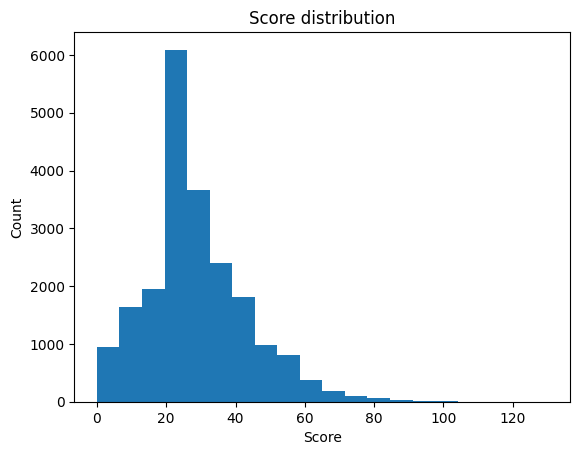

In [132]:
plt.hist(df_merged["score"],bins=20)
plt.title("Score distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

### Inspect the dataset manually (only scores higher than 40)

In [87]:
pl.Config.set_tbl_rows(30)
samples = df_merged.filter( pl.col("score") > 40 )[["fid","fname","score"]].sample(30,seed=1)
samples

fid,fname,score
i64,str,f64
244196,"""winrhcp""",55.043
351704,"""rock1""",74.93
532807,"""alexnl73""",51.861
580795,"""pengyue""",56.834
406130,"""bigwayhnt""",56.537
300521,"""zheezzy""",45.359206
545318,"""dashie-eth""",40.468
210659,"""asimosan""",49.419
555775,"""proxygsm""",40.685


In [106]:
manual_inspection = {
  'winrhcp': True,
  'rock1': True,
  'alexnl73': True,
  'pengyue': True,
  'bigwayhnt': True,
  'zheezzy': True,
  'dashie-eth': True,
  'asimosan': True,
  'proxygsm': True,
  'zaraki': True,
  'mg': False,
  'rosheed': True,
  'breezer29.eth': True,
  'bing': True,
  '770': True,
  'metaversys': True,
  'onucel.eth': False,
  'bonviwankenobi': True,
  'ololo': False,
  'kashyap': True,
  'tokenomist': True,
  'samslav': True,
  'rqks': False,
  'ertu': True,
  'longhodl.eth': False,
  'rivne': True,
  'maxionline': True,
  'kesharisinh': True,
  'x0uchi': True,
  'ephemeral.eth': False
 }

In [107]:
true_count = sum(1 for x in manual_inspection.values() if x)
false_count = sum(1 for x in manual_inspection.values() if not x)

print(f"Bot percentage: {(100*true_count/(true_count+false_count)):.2f}%")

Bot percentage: 80.00%


### Conclusion

In general, it seems many sybil accounts seek verifications, being able to achieve them. This way, owning verifications such as X pair account, ENS name and Gitcoin scores showed to not be a reliable human proof.